In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
def function(x):
    return 10*x**2 - 5*x - 0.5

In [3]:
x_train = np.random.rand(10000)
y_train = function(x_train)

x_test = np.linspace(0, 1, 100)
y_test = function(x_test)

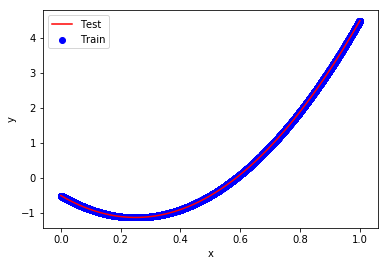

In [4]:
plt.scatter(x_train, y_train, label='Train', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [5]:
model = Sequential()
model.add(Dense(units=200, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 100 samples
Epoch 1/10
10000/10000 [==============================] - 0s 35us/step - loss: 1.0667 - val_loss: 0.0560
Epoch 2/10
10000/10000 [==============================] - 0s 22us/step - loss: 0.0193 - val_loss: 0.0108
Epoch 3/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.0078 - val_loss: 0.0072
Epoch 4/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.0058 - val_loss: 0.0055
Epoch 5/10
10000/10000 [==============================] - 0s 22us/step - loss: 0.0045 - val_loss: 0.0043
Epoch 6/10
10000/10000 [==============================] - 0s 20us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/10
10000/10000 [==============================] - 0s 18us/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/10
10000/10000 [==============================] - 0s 20us/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/10
10000/10000 [==============================] - 0s 23u

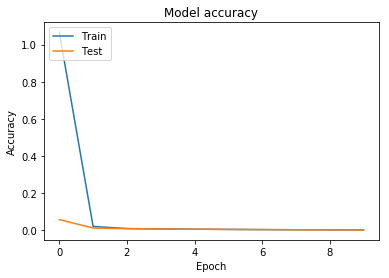

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
y_predictions = model.predict(x_test, batch_size=1)

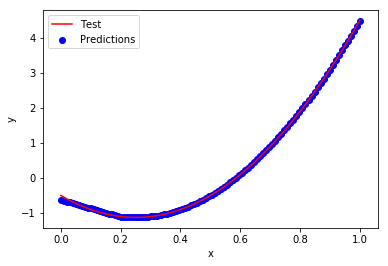

In [9]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()